In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3

db_path = r'C:\Users\Lenovo\Documents\Bioinformatics MSc\2024\Discovery\Basic Database\PreGE\THE_FINAL_ONE.db'

In [15]:
query = '''
    SELECT gene_id, log2foldChange, adj_p_value
    FROM differential_expression
    WHERE study_id = 'ERP000427';
'''

C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


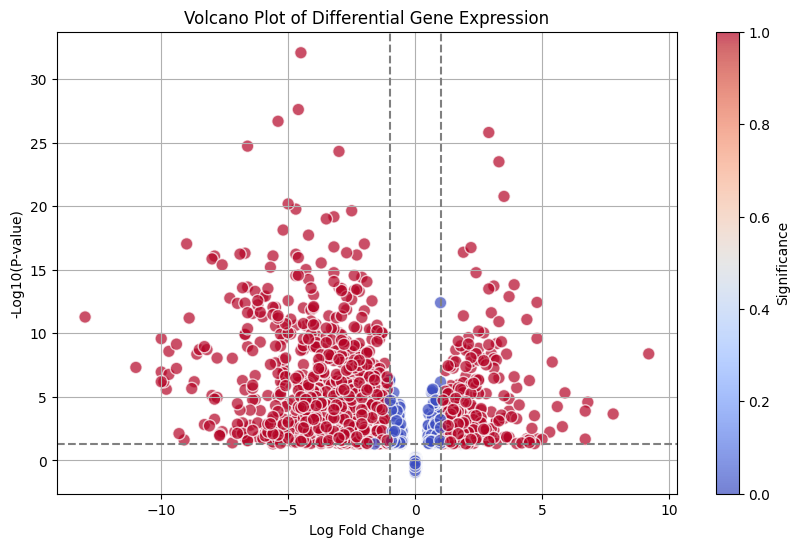

In [16]:


# Connect to the SQLite database (or other databases if applicable)
conn = sqlite3.connect(db_path)

df = pd.read_sql_query(query, conn)

conn.close()

# Data preprocessing
df['minus_log10_p_value'] = -np.log10(df['adj_p_value'])
df['significant'] = (df['adj_p_value'] < 0.05) & (np.abs(df['log2FoldChange']) > 1)  # Example thresholds

# Create the volcano plot
plt.figure(figsize=(10, 6))
plt.scatter(df['log2FoldChange'], df['minus_log10_p_value'], 
            c=df['significant'], cmap='coolwarm', alpha=0.7, edgecolors='w', s=80)
plt.axhline(y=-np.log10(0.05), color='grey', linestyle='--')
plt.axvline(x=1, color='grey', linestyle='--')
plt.axvline(x=-1, color='grey', linestyle='--')
plt.title('Volcano Plot of Differential Gene Expression')
plt.xlabel('Log Fold Change')
plt.ylabel('-Log10(P-value)')
plt.colorbar(label='Significance')
plt.grid(True)
plt.show()
